In [1]:
from pyspark.sql import SparkSession

# Create a spark session (which will run spark jobs)
spark = (
    SparkSession.builder.appName("MAST30034 Project 1")
    .config("spark.sql.repl.eagerEval.enabled", True) 
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .getOrCreate()
)

your 131072x1 screen size is bogus. expect trouble
24/09/24 15:59:50 WARN Utils: Your hostname, DESKTOP-Q5SP5SI resolves to a loopback address: 127.0.1.1; using 172.20.36.110 instead (on interface eth0)
24/09/24 15:59:50 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/09/24 15:59:55 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
from urllib.request import urlretrieve
import os

# from the current `tute_1` directory, go back two levels to the `MAST30034` directory
output_relative_dir = '../data/landing'

# check if it exists as it makedir will raise an error if it does exist
if not os.path.exists(output_relative_dir):
    os.makedirs(output_relative_dir)
    
# now, for each type of data set we will need, we will create the paths
for target_dir in ('2024'): # taxi_zones should already exist
    if not os.path.exists(output_relative_dir + target_dir):
        os.makedirs(output_relative_dir + target_dir)

In [3]:

URL_24 = "https://www.dffh.vic.gov.au/moving-annual-rent-suburb-march-quarter-2024-excel"


In [4]:
output_dir_24 = f"{output_relative_dir}/2024.xlsx"
# download
urlretrieve(URL_24, output_dir_24) 

('../data/landing/2024.xlsx', <http.client.HTTPMessage at 0x7fab20261900>)

In [5]:
import pandas as pd

In [6]:
df_24 = pd.read_excel('../data/landing/2024.xlsx')
df_24.head()

,Moving annual rent by suburb,Unnamed: 1,Lease commenced in year ending,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195
0,1 bedroom flat,NaN,Mar 2000,NaN,Jun 2000,NaN,Sep 2000,NaN,Dec 2000,NaN,...,Mar 2023,NaN,Jun 2023,NaN,Sep 2023,NaN,Dec 2023,NaN,Mar 2024,NaN
1,NaN,NaN,Count,Median,Count,Median,Count,Median,Count,Median,...,Count,Median,Count,Median,Count,Median,Count,Median,Count,Median
2,Inner Melbourne,Albert Park-Middle Park-West St Kilda,352,165,347,165,378,170,369,175,...,266,360,246,370,229,395,224,400,194,425
3,NaN,Armadale,210,150,212,150,213,155,213,160,...,205,360,185,385,175,400,148,408,154,430
4,NaN,Carlton North,87,150,78,155,74,150,65,150,...,65,370,64,380,58,380,53,380,41,400


In [7]:
# Median rent dataframe
med_df_24 = df_24.iloc[:, 1::2]
med_df_24.head()

,Unnamed: 1,Unnamed: 3,Unnamed: 5,Unnamed: 7,Unnamed: 9,Unnamed: 11,Unnamed: 13,Unnamed: 15,Unnamed: 17,Unnamed: 19,...,Unnamed: 177,Unnamed: 179,Unnamed: 181,Unnamed: 183,Unnamed: 185,Unnamed: 187,Unnamed: 189,Unnamed: 191,Unnamed: 193,Unnamed: 195
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Median,Median,Median,Median,Median,Median,Median,Median,Median,...,Median,Median,Median,Median,Median,Median,Median,Median,Median,Median
2,Albert Park-Middle Park-West St Kilda,165,165,170,175,180,185,190,190,195,...,320,315,325,340,350,360,370,395,400,425
3,Armadale,150,150,155,160,160,160,165,165,165,...,315,310,320,338,350,360,385,400,408,430
4,Carlton North,150,155,150,150,160,160,160,160,165,...,300,300,320,320,330,370,380,380,380,400


In [8]:
months = ['March', 'June', 'September', 'December']
years = range(2000, 2024)  # 2024 is not included

# Initialize an empty list to store the results
new_header = ['suburbs']

# Loop through each year and each month
for year in years:
    for month in months:
        new_header.append(f"{month} {year}")

new_header.append(f"March 2024")
# Print the result
print(new_header)

['suburbs', 'March 2000', 'June 2000', 'September 2000', 'December 2000', 'March 2001', 'June 2001', 'September 2001', 'December 2001', 'March 2002', 'June 2002', 'September 2002', 'December 2002', 'March 2003', 'June 2003', 'September 2003', 'December 2003', 'March 2004', 'June 2004', 'September 2004', 'December 2004', 'March 2005', 'June 2005', 'September 2005', 'December 2005', 'March 2006', 'June 2006', 'September 2006', 'December 2006', 'March 2007', 'June 2007', 'September 2007', 'December 2007', 'March 2008', 'June 2008', 'September 2008', 'December 2008', 'March 2009', 'June 2009', 'September 2009', 'December 2009', 'March 2010', 'June 2010', 'September 2010', 'December 2010', 'March 2011', 'June 2011', 'September 2011', 'December 2011', 'March 2012', 'June 2012', 'September 2012', 'December 2012', 'March 2013', 'June 2013', 'September 2013', 'December 2013', 'March 2014', 'June 2014', 'September 2014', 'December 2014', 'March 2015', 'June 2015', 'September 2015', 'December 201

In [9]:
print(len(new_header))


98


In [10]:
med_df_24.columns = new_header
print(med_df_24)

                                   suburbs March 2000 June 2000  \
0                                      NaN        NaN       NaN   
1                                      NaN     Median    Median   
2    Albert Park-Middle Park-West St Kilda        165       165   
3                                 Armadale        150       150   
4                            Carlton North        150       155   
..                                     ...        ...       ...   
156                            Wanagaratta         85        85   
157                               Warragul         80        75   
158                            Warrnambool         75        75   
159                                Wodonga         85        85   
160                            Group Total         80        80   

    September 2000 December 2000 March 2001 June 2001 September 2001  \
0              NaN           NaN        NaN       NaN            NaN   
1           Median        Median     Median    Medi

In [11]:
med_df = med_df_24.iloc[2:]
print(med_df)

                                   suburbs March 2000 June 2000  \
2    Albert Park-Middle Park-West St Kilda        165       165   
3                                 Armadale        150       150   
4                            Carlton North        150       155   
5                        Carlton-Parkville        165       170   
6                          CBD-St Kilda Rd        250       250   
..                                     ...        ...       ...   
156                            Wanagaratta         85        85   
157                               Warragul         80        75   
158                            Warrnambool         75        75   
159                                Wodonga         85        85   
160                            Group Total         80        80   

    September 2000 December 2000 March 2001 June 2001 September 2001  \
2              170           175        180       185            190   
3              155           160        160       1

In [12]:
# Count rent dataframe
c_df_24 = df_24.iloc[:, 2::2]
c_df_24.head()

,Lease commenced in year ending,Unnamed: 4,Unnamed: 6,Unnamed: 8,Unnamed: 10,Unnamed: 12,Unnamed: 14,Unnamed: 16,Unnamed: 18,Unnamed: 20,...,Unnamed: 176,Unnamed: 178,Unnamed: 180,Unnamed: 182,Unnamed: 184,Unnamed: 186,Unnamed: 188,Unnamed: 190,Unnamed: 192,Unnamed: 194
0,Mar 2000,Jun 2000,Sep 2000,Dec 2000,Mar 2001,Jun 2001,Sep 2001,Dec 2001,Mar 2002,Jun 2002,...,Dec 2021,Mar 2022,Jun 2022,Sep 2022,Dec 2022,Mar 2023,Jun 2023,Sep 2023,Dec 2023,Mar 2024
1,Count,Count,Count,Count,Count,Count,Count,Count,Count,Count,...,Count,Count,Count,Count,Count,Count,Count,Count,Count,Count
2,352,347,378,369,395,411,405,423,424,413,...,299,269,262,277,262,266,246,229,224,194
3,210,212,213,213,206,198,195,191,194,200,...,226,223,234,238,239,205,185,175,148,154
4,87,78,74,65,73,78,73,73,71,72,...,80,79,68,72,71,65,64,58,53,41


In [13]:
# dataframe of column of suburbs
c_sub_df = df_24.iloc[:,1]
c_sub_df.head()

0                                      NaN
1                                      NaN
2    Albert Park-Middle Park-West St Kilda
3                                 Armadale
4                            Carlton North
Name: Unnamed: 1, dtype: object

In [14]:
c_df = pd.concat([c_sub_df,c_df_24], axis=1)
c_df.head() 

,Unnamed: 1,Lease commenced in year ending,Unnamed: 4,Unnamed: 6,Unnamed: 8,Unnamed: 10,Unnamed: 12,Unnamed: 14,Unnamed: 16,Unnamed: 18,...,Unnamed: 176,Unnamed: 178,Unnamed: 180,Unnamed: 182,Unnamed: 184,Unnamed: 186,Unnamed: 188,Unnamed: 190,Unnamed: 192,Unnamed: 194
0,NaN,Mar 2000,Jun 2000,Sep 2000,Dec 2000,Mar 2001,Jun 2001,Sep 2001,Dec 2001,Mar 2002,...,Dec 2021,Mar 2022,Jun 2022,Sep 2022,Dec 2022,Mar 2023,Jun 2023,Sep 2023,Dec 2023,Mar 2024
1,NaN,Count,Count,Count,Count,Count,Count,Count,Count,Count,...,Count,Count,Count,Count,Count,Count,Count,Count,Count,Count
2,Albert Park-Middle Park-West St Kilda,352,347,378,369,395,411,405,423,424,...,299,269,262,277,262,266,246,229,224,194
3,Armadale,210,212,213,213,206,198,195,191,194,...,226,223,234,238,239,205,185,175,148,154
4,Carlton North,87,78,74,65,73,78,73,73,71,...,80,79,68,72,71,65,64,58,53,41


In [32]:
print(c_df)

                    suburbs March 2000 June 2000 September 2000 December 2000  \
4             Carlton North         87        78             74            65   
5         Carlton-Parkville        298       297            312           346   
6           CBD-St Kilda Rd        755       861            934           952   
7    Collingwood-Abbotsford        130       114            115           114   
8                 Docklands          -         -              -             -   
..                      ...        ...       ...            ...           ...   
156             Wanagaratta         51        46             44            47   
157                Warragul         13        11             12            10   
158             Warrnambool        113       104            108           105   
159                 Wodonga         77        72             77            83   
160             Group Total       1132      1125           1148          1149   

    March 2001 June 2001 Se

In [31]:
nan_rows = c_df[c_df.isna().any(axis=1)]
print(nan_rows)

Empty DataFrame
Columns: [suburbs, March 2000, June 2000, September 2000, December 2000, March 2001, June 2001, September 2001, December 2001, March 2002, June 2002, September 2002, December 2002, March 2003, June 2003, September 2003, December 2003, March 2004, June 2004, September 2004, December 2004, March 2005, June 2005, September 2005, December 2005, March 2006, June 2006, September 2006, December 2006, March 2007, June 2007, September 2007, December 2007, March 2008, June 2008, September 2008, December 2008, March 2009, June 2009, September 2009, December 2009, March 2010, June 2010, September 2010, December 2010, March 2011, June 2011, September 2011, December 2011, March 2012, June 2012, September 2012, December 2012, March 2013, June 2013, September 2013, December 2013, March 2014, June 2014, September 2014, December 2014, March 2015, June 2015, September 2015, December 2015, March 2016, June 2016, September 2016, December 2016, March 2017, June 2017, September 2017, December

From the above, we can note that there are no NULL values in the dataset 

In [102]:
import numpy as np
def log_average(series):
    series = pd.to_numeric(series, errors='coerce')
    series = series.astype(float)
    log_values = np.log(series)
    log_mean = np.mean(log_values)
    return np.exp(log_mean)

In [64]:
med_log_ave = med_df.iloc[:, 1:].apply(log_average)

In [68]:
med_log_ave = pd.DataFrame(med_log_ave)
print(med_log_ave.index)
# the months are the index and the values are the first column 

Index(['March 2000', 'June 2000', 'September 2000', 'December 2000',
       'March 2001', 'June 2001', 'September 2001', 'December 2001',
       'March 2002', 'June 2002', 'September 2002', 'December 2002',
       'March 2003', 'June 2003', 'September 2003', 'December 2003',
       'March 2004', 'June 2004', 'September 2004', 'December 2004',
       'March 2005', 'June 2005', 'September 2005', 'December 2005',
       'March 2006', 'June 2006', 'September 2006', 'December 2006',
       'March 2007', 'June 2007', 'September 2007', 'December 2007',
       'March 2008', 'June 2008', 'September 2008', 'December 2008',
       'March 2009', 'June 2009', 'September 2009', 'December 2009',
       'March 2010', 'June 2010', 'September 2010', 'December 2010',
       'March 2011', 'June 2011', 'September 2011', 'December 2011',
       'March 2012', 'June 2012', 'September 2012', 'December 2012',
       'March 2013', 'June 2013', 'September 2013', 'December 2013',
       'March 2014', 'June 2014', 

In [66]:
first = (med_log_ave.iloc[:,0])
print(first)

March 2000        110.415653
June 2000         111.966604
September 2000    113.693955
December 2000     114.141440
March 2001        115.862483
                     ...    
March 2023        316.109055
June 2023         326.066730
September 2023    337.745150
December 2023     347.315725
March 2024        359.446389
Name: 0, Length: 97, dtype: float64


In [82]:
dates = pd.to_datetime(med_log_ave.index,format='%B %Y')
print(dates)

DatetimeIndex(['2000-03-01', '2000-06-01', '2000-09-01', '2000-12-01',
               '2001-03-01', '2001-06-01', '2001-09-01', '2001-12-01',
               '2002-03-01', '2002-06-01', '2002-09-01', '2002-12-01',
               '2003-03-01', '2003-06-01', '2003-09-01', '2003-12-01',
               '2004-03-01', '2004-06-01', '2004-09-01', '2004-12-01',
               '2005-03-01', '2005-06-01', '2005-09-01', '2005-12-01',
               '2006-03-01', '2006-06-01', '2006-09-01', '2006-12-01',
               '2007-03-01', '2007-06-01', '2007-09-01', '2007-12-01',
               '2008-03-01', '2008-06-01', '2008-09-01', '2008-12-01',
               '2009-03-01', '2009-06-01', '2009-09-01', '2009-12-01',
               '2010-03-01', '2010-06-01', '2010-09-01', '2010-12-01',
               '2011-03-01', '2011-06-01', '2011-09-01', '2011-12-01',
               '2012-03-01', '2012-06-01', '2012-09-01', '2012-12-01',
               '2013-03-01', '2013-06-01', '2013-09-01', '2013-12-01',
      

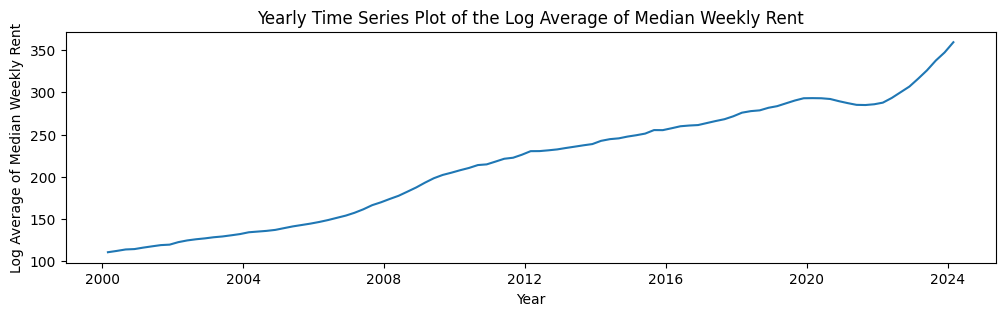

In [106]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Plot the data
plt.figure(figsize=(12, 3))
plt.plot(dates, med_log_ave.iloc[:,0])
plt.title('Yearly Time Series Plot of the Log Average of Median Weekly Rent')
plt.xlabel('Year')
plt.ylabel('Log Average of Median Weekly Rent')
plt.show()

In [103]:
count_log_ave = c_df.iloc[:, 1:].apply(log_average)
count_log_ave = pd.DataFrame(count_log_ave)
print(count_log_ave)

                         0
March 2000       95.065327
June 2000        97.367099
September 2000   94.120040
December 2000    96.788375
March 2001       98.795611
...                    ...
March 2023      126.947422
June 2023       127.478223
September 2023  122.548824
December 2023   117.080377
March 2024      111.509205

[97 rows x 1 columns]


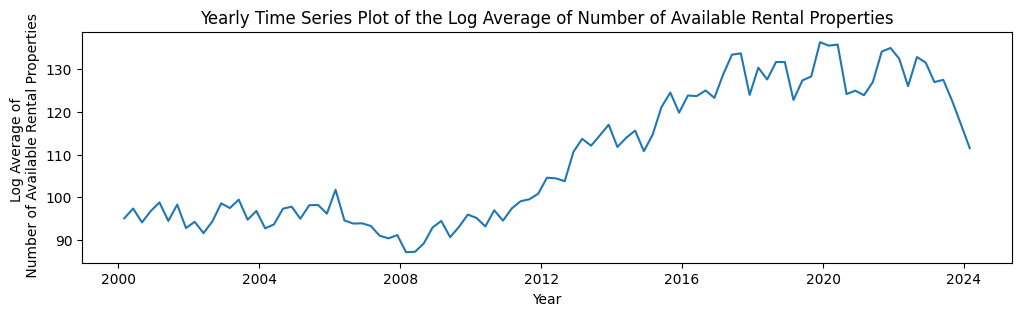

In [108]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Plot the data
plt.figure(figsize=(12, 3))
plt.plot(dates, count_log_ave.iloc[:,0])
plt.title('Yearly Time Series Plot of the Log Average of Number of Available Rental Properties')
plt.xlabel('Year')
plt.ylabel('Log Average of \n Number of Available Rental Properties')
plt.show()